# Demostración con Gradio


Este cuaderno presenta, mediante un ejemplo, la biblioteca [Gradio](https://www.gradio.app/), que permite crear interfaces de demostración de manera sencilla.


## Interfaz de detección de objetos


En este ejemplo, utilizamos un modelo de detección de objetos en imágenes, entrenado con las 80 clases del conjunto de datos [COCO](https://cocodataset.org/#home).
Empleamos el modelo [DETR](https://research.facebook.com/publications/end-to-end-object-detection-with-transformers/) de Meta (facebook/detr-resnet-50).


### Implementación


Primero, construyamos nuestro *pipeline* utilizando la biblioteca *transformers* de Hugging Face.


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline
import cv2
import numpy as np

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
detector = pipeline("object-detection", "facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


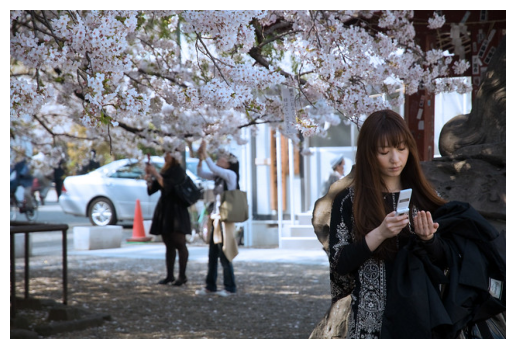

In [3]:
image = Image.open('images/coco3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

Procedamos a la detección y dibujemos los recuadros. Para obtener un resultado claro, solo rodearemos a las personas. Puedes eliminar este filtro si lo deseas.


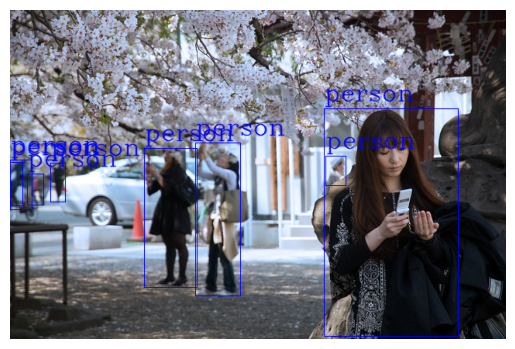

In [4]:
def draw_boxes(image,output):
  cv_image = np.array(image)
  for bbox in output:
    box = bbox['box']
    label = bbox['label']
    if (label!="person"):
      continue
    cv2.rectangle(cv_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 1)
    cv2.putText(cv_image, label, (box['xmin'], box['ymin'] - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
  return cv_image

output = detector(image)
cv_image=draw_boxes(image,output)
plt.imshow(cv_image)
plt.axis('off')
plt.show()


### Demostración con Gradio


Ahora es el momento de construir nuestra demostración con Gradio. La idea es tener una interfaz que tome una imagen como entrada y devuelva la misma imagen con las personas rodeadas.


In [5]:
import gradio as gr

In [6]:
def get_pipeline_prediction(pil_image):
  pipeline_output = detector(pil_image)
  processed_image = draw_boxes(pil_image,pipeline_output)
  return processed_image

In [7]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Image d'entrée",type="pil"),
  outputs=gr.Image(label="Image avec les personnes détectées",type="pil")
)

IMPORTANT: You are using gradio version 4.24.0, however version 4.29.0 is available, please upgrade.
--------


In [8]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


¡Listo! Ya has construido tu propia demostración. Es posible compartirla activando el parámetro *share=True* en el método *launch()*. Sin embargo, deberás mantener tu cuaderno activo; de lo contrario, la demostración desaparecerá. Para crear una demostración que no requiera mantener tu computadora encendida, puedes crear un *space* en el sitio de Hugging Face (consulta el cuaderno 1).


**Nota**: Por supuesto, Gradio ofrece más funcionalidades. Te invito a consultar la [documentación](https://www.gradio.app/docs) y los distintos [tutoriales](https://www.gradio.app/guides/quickstart) si tienes una necesidad específica.
